In this notebook, we will analyze the data to extract meaningful insights. The analysis will include exploring patterns, trends, and relationships within the dataset.

We will work with various datasets, including user activity, video features, social networks, and captions. The datasets have been cleaned and preprocessed to ensure consistency and accuracy. Key steps in the analysis include:

1. **Data Exploration**: Understanding the structure, distribution, and relationships within the data.
2. **Visualization**: Using plots and charts to identify trends and patterns.
3. **Feature Analysis**: Investigating specific features like user activity levels, video categories, and social network connections.
4. **Insights Extraction**: Deriving actionable insights from the data to inform decision-making.

The datasets include:
- **Captions**: Textual data associated with videos, including manual cover text, captions, and category information.
- **Item Categories**: Video category features and their hierarchical structure.
- **Item Features**: Detailed metadata about videos, such as duration, tags, and engagement metrics.
- **Small Matrix**: User-video interaction data, including play duration and watch ratios.
- **Social Network**: User connections and friend lists.
- **User Features**: User-level attributes, such as activity levels, follower counts, and registration details.

Each dataset will be analyzed to uncover insights that can help improve user engagement, content recommendations, and overall platform performance.

In [1]:
import load_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
print("load data not clean")
small_matrix, big_matrix, item_categories, item_features, social_network, user_features, captions = load_data.load_data(clean=False)

print("load data clean")
small_matrix_clean, big_matrix_clean, item_categories_clean, item_features_clean, social_network_clean, user_features_clean, captions_clean = load_data.load_data(clean=True)



load data not clean
Loading data...
Data loaded.
load data clean
Loading data...
Data loaded.
Cleaning data...
Data cleaned.


In [11]:
# Print the shapes of the matrices
print(f"Small matrix shape: {small_matrix.shape}")
print(f"Big matrix shape: {big_matrix.shape}")
print(f"Item categories shape: {item_categories.shape}")
print(f"Item features shape: {item_features.shape}")
print(f"Social network shape: {social_network.shape}")
print(f"User features shape: {user_features.shape}")
print(f"Captions shape: {captions.shape}")

# Print the number of lines cleaned
print(f"Number of lines cleaned for small_matrix: {len(small_matrix) - len(small_matrix_clean)}")
print(f"Number of lines cleaned for big_matrix: {len(big_matrix) - len(big_matrix_clean)}")
print(f"Number of lines cleaned item_categories: {len(item_categories) - len(item_categories_clean)}")

# Print the number of unique users and items
print(f"Number of unique users in small_matrix: {len(small_matrix['user_id'].unique())}")
print(f"Number of unique items in small_matrix: {len(small_matrix['video_id'].unique())}")
print(f"Number of unique users in big_matrix: {len(big_matrix['user_id'].unique())}")
print(f"Number of unique items in big_matrix: {len(big_matrix['video_id'].unique())}")



Small matrix shape: (4676570, 8)
Big matrix shape: (12530806, 8)
Item categories shape: (10728, 2)
Item features shape: (343341, 58)
Social network shape: (472, 2)
User features shape: (7176, 31)
Captions shape: (10732, 10)
Number of lines cleaned for small_matrix: 181992
Number of lines cleaned for big_matrix: 965819
Number of lines cleaned item_categories: 0
Number of unique users in small_matrix: 1411
Number of unique items in small_matrix: 3327
Number of unique users in big_matrix: 7176
Number of unique items in big_matrix: 10728


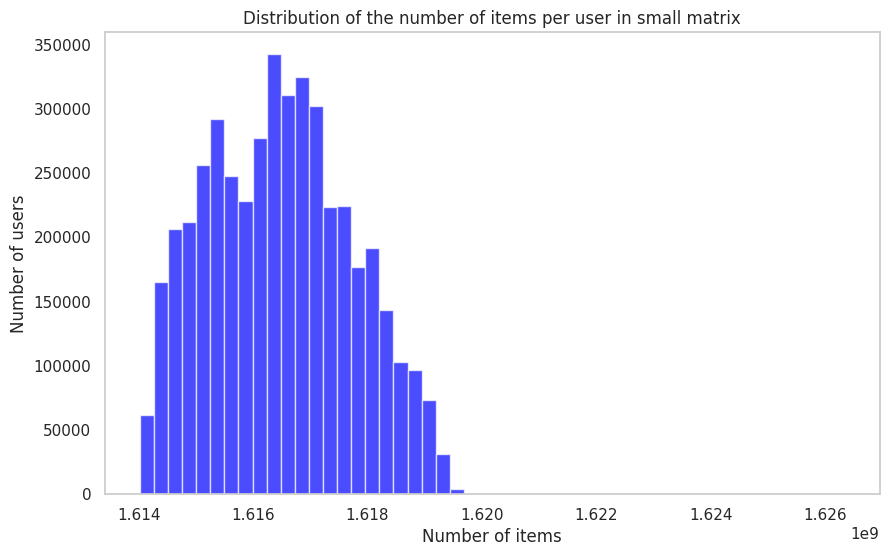

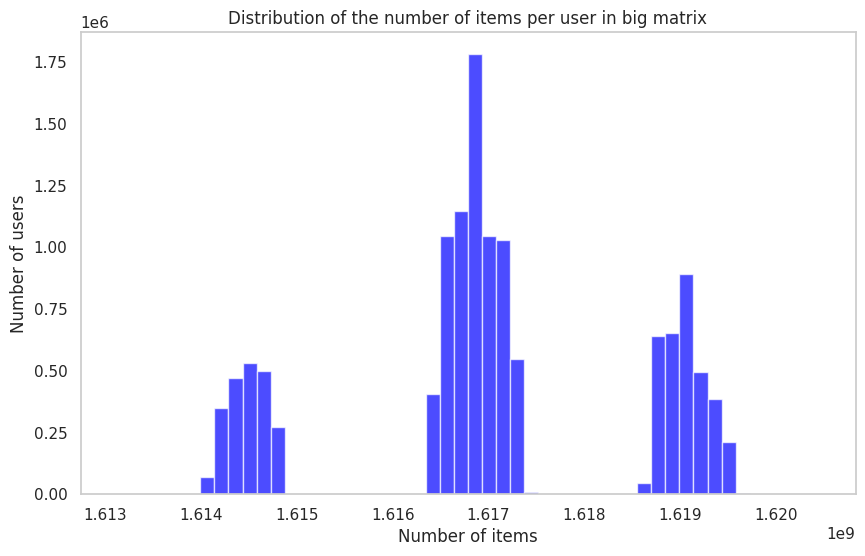

In [4]:
# Plot the distribution of the number of items per user

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Ensure all columns are numeric before summing
small_matrix_clean_numeric = small_matrix_clean.apply(pd.to_numeric, errors='coerce').fillna(0)
plt.hist(small_matrix_clean_numeric.sum(axis=1), bins=50, color='blue', alpha=0.7)
plt.title("Distribution of the number of items per user in small matrix")
plt.xlabel("Number of items")
plt.ylabel("Number of users")
plt.grid()
plt.show()

# Ensure all columns are numeric before summing
big_matrix_numeric = big_matrix.apply(pd.to_numeric, errors='coerce').fillna(0)
plt.figure(figsize=(10, 6))
plt.hist(big_matrix_numeric.sum(axis=1), bins=50, color='blue', alpha=0.7)
plt.title("Distribution of the number of items per user in big matrix")
plt.xlabel("Number of items")
plt.ylabel("Number of users")
plt.grid()
plt.show()

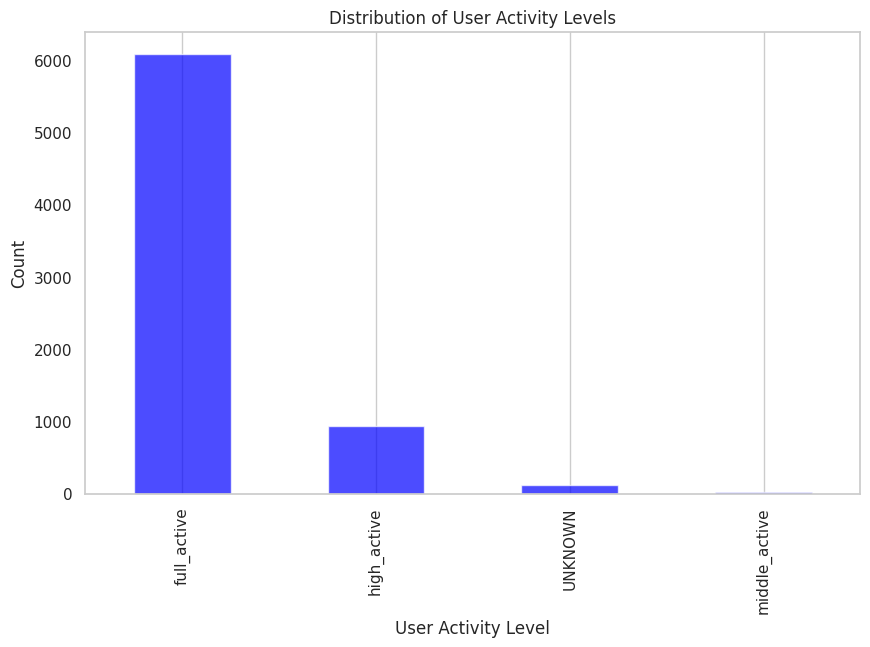

In [9]:
# Analyze and visualize the distribution of user activity levels in `user_features_clean`
user_activity_counts = user_features_clean['user_active_degree'].value_counts()
plt.figure(figsize=(10, 6))
user_activity_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Distribution of User Activity Levels")
plt.xlabel("User Activity Level")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()